In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [48]:
data.shape

(344, 7)

In [49]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

In [52]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [53]:
data.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [54]:
data['sex'].replace({'.':'MALE'},inplace=True)

In [55]:
data.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

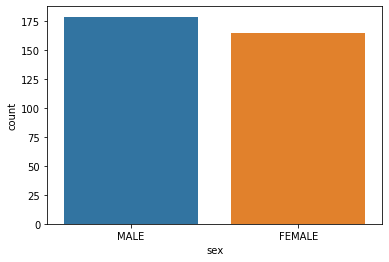

In [56]:
sns.countplot(x='sex',data=data)

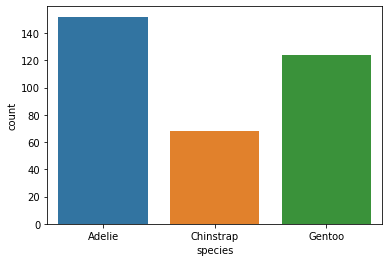

In [57]:
sns.countplot(x='species',data=data)

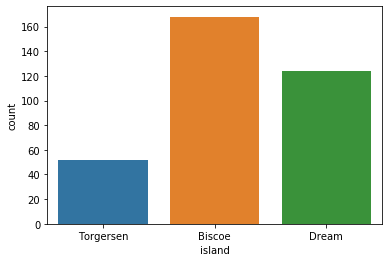

In [58]:
sns.countplot(x='island',data=data)

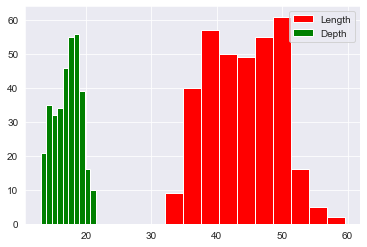

In [67]:
length = data.culmen_length_mm
depth = data.culmen_depth_mm
plt.hist(length,color = 'red',label='Length')
plt.hist(depth,color='green',label='Depth')
plt.legend()


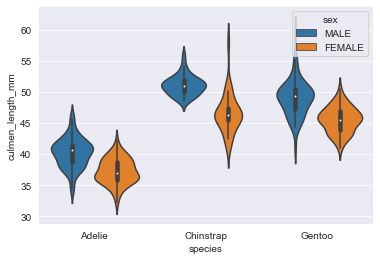

In [73]:
sns.violinplot(x='species',y='culmen_length_mm',hue='sex',data=data)

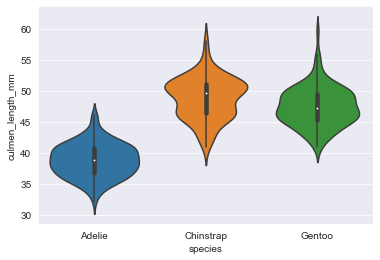

In [74]:
sns.violinplot(x='species',y='culmen_length_mm',hue_order='sex',data=data)

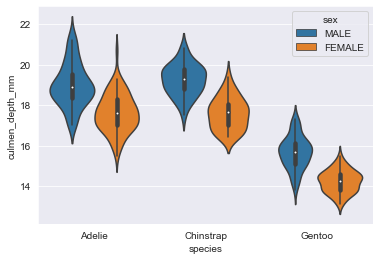

In [76]:
sns.violinplot(x='species',y='culmen_depth_mm',hue='sex',data=data)

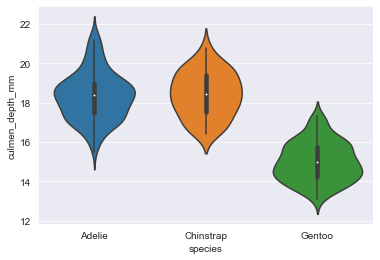

In [77]:
sns.violinplot(x='species',y='culmen_depth_mm',hue_order='sex',data=data)

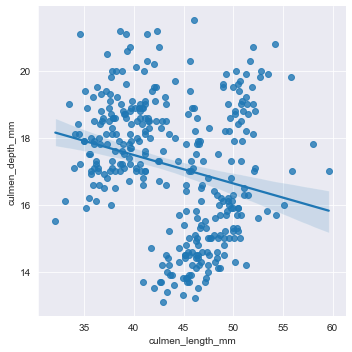

In [82]:
sns.lmplot(x='culmen_length_mm',y='culmen_depth_mm',data=data)

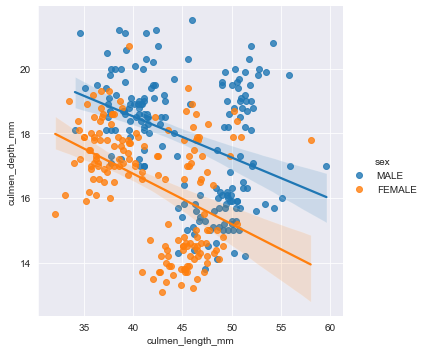

In [81]:
sns.lmplot(x='culmen_length_mm',y='culmen_depth_mm',data=data,hue='sex')

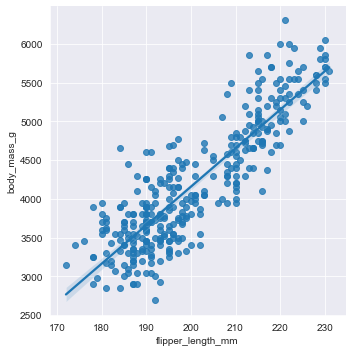

In [83]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=data)

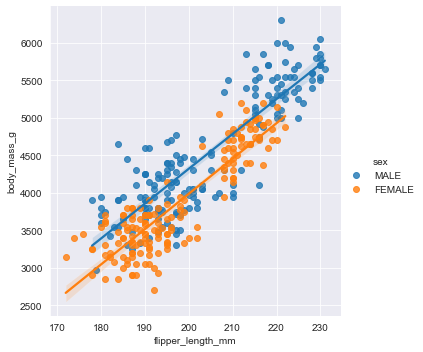

In [84]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=data,hue='sex')

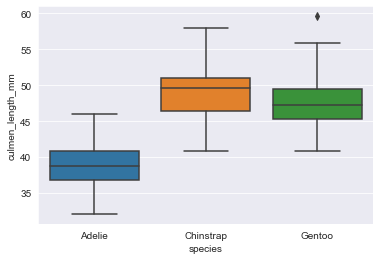

In [85]:
sns.boxplot(x='species',y='culmen_length_mm',data=data)

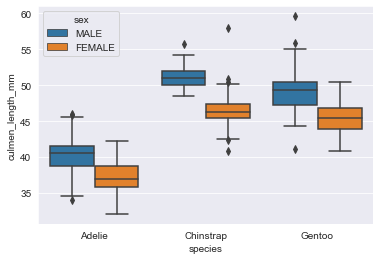

In [86]:
sns.boxplot(x='species',y='culmen_length_mm',data=data,hue='sex')

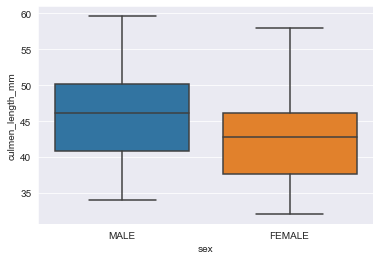

In [87]:
sns.boxplot(x='sex',y='culmen_length_mm',data=data)

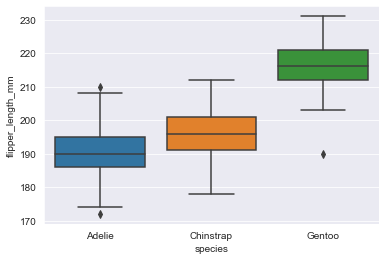

In [88]:
sns.boxplot(x='species',y='flipper_length_mm',data=data)

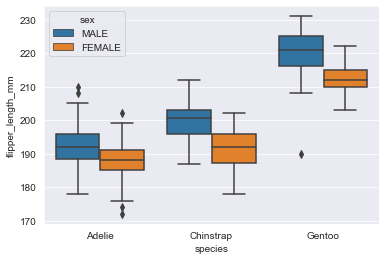

In [89]:
sns.boxplot(x='species',y='flipper_length_mm',data=data,hue='sex')

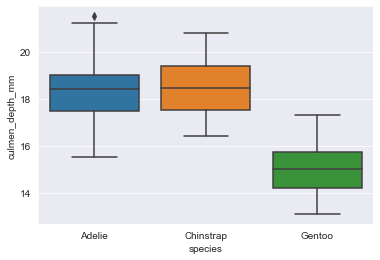

In [93]:
sns.boxplot(x='species',y='culmen_depth_mm',data=data)

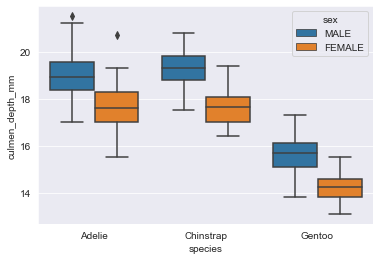

In [94]:
sns.boxplot(x='species',y='culmen_depth_mm',data=data,hue='sex')

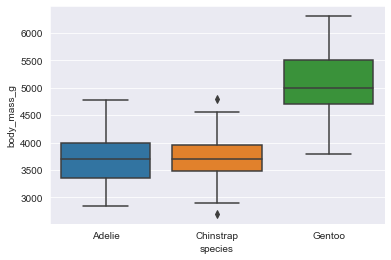

In [95]:
sns.boxplot(x='species',y='body_mass_g',data=data)

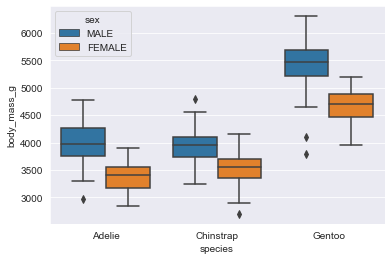

In [96]:
sns.boxplot(x='species',y='body_mass_g',data=data,hue='sex')

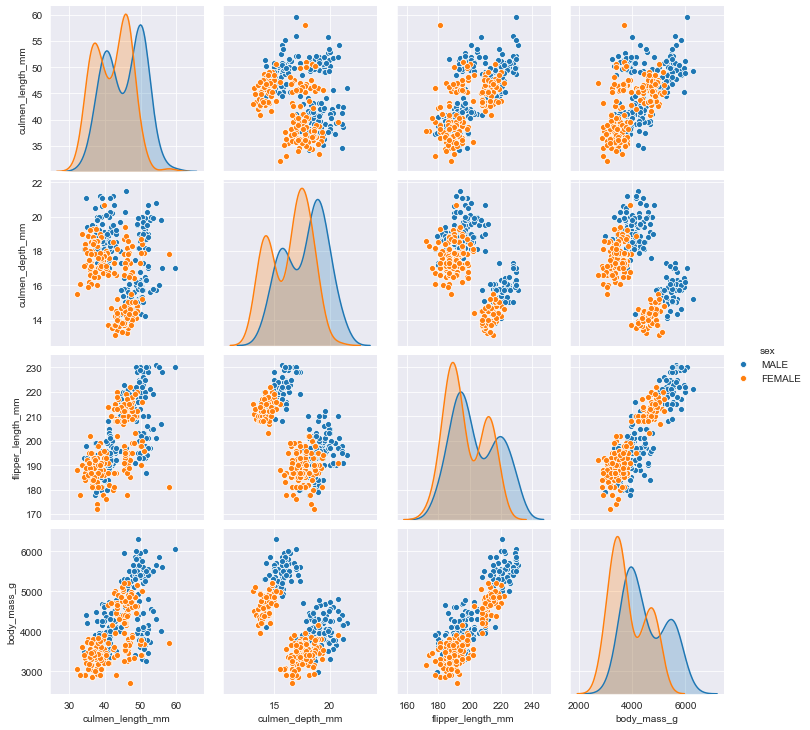

In [98]:
sns.pairplot(data,hue='sex')

In [100]:
data['sex'].replace({'MALE':0,'FEMALE':1},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [102]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [103]:
y = data[['sex']]

In [104]:
y.head()

,sex
0,0
1,1
2,1
3,0
4,1


In [112]:
decode = pd.get_dummies(data[['species','island']],drop_first=True)

In [113]:
decode

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
339,0,1,0,0
340,0,1,0,0
341,0,1,0,0
342,0,1,0,0


In [114]:
X = pd.concat([data,decode],axis=1)

In [115]:
X.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,0,0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,0,0,1


In [116]:
X.drop(['species','island','sex'],axis=1,inplace=True)

In [117]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
3,41.1,17.0,190.0,3800.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [126]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [128]:
logistic = LogisticRegression().fit(X_train,y_train)
logistic_train_dataset_predict = logistic.predict(X_train)
logistic_test_dataset_predict = logistic.predict(X_test)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
print("Accuracy on training dataset :",accuracy_score(y_train,logistic_train_dataset_predict))
print("Accuracy on test dataset :",accuracy_score(y_test,logistic_test_dataset_predict))

Accuracy on training dataset : 0.808695652173913
Accuracy on test dataset : 0.8596491228070176


In [130]:
print("Classification report is :")
print(classification_report(y_test,logistic_test_dataset_predict))

Classification report is :
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.87      0.80      0.84        51

    accuracy                           0.86       114
   macro avg       0.86      0.85      0.86       114
weighted avg       0.86      0.86      0.86       114



In [131]:
print("Confusion matrix is :")
print(confusion_matrix(y_test,logistic_test_dataset_predict))

Confusion matrix is :
[[57  6]
 [10 41]]


## SVC

In [132]:
SVM = SVC().fit(X_train,y_train)
SVM_training_dataset_prediction = SVM.predict(X_train)
SVM_test_dataset_prediction = SVM.predict(X_test)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [133]:
print('Training Dataset Accuracy :',accuracy_score(y_train,SVM_training_dataset_prediction))
print('Test Dataset Accuracy :',accuracy_score(y_test,SVM_test_dataset_prediction))

Training Dataset Accuracy : 0.5782608695652174
Test Dataset Accuracy : 0.6491228070175439


In [135]:
print("Classification Report is :") 
print(classification_report(y_test,SVM_test_dataset_prediction))

Classification Report is :
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        63
           1       0.59      0.73      0.65        51

    accuracy                           0.65       114
   macro avg       0.66      0.66      0.65       114
weighted avg       0.66      0.65      0.65       114



In [137]:
print('Confusion Matrix is')
print(confusion_matrix(y_test,SVM_test_dataset_prediction))

Confusion Matrix is
[[37 26]
 [14 37]]


## Decision Tree

In [138]:
tree = DecisionTreeClassifier().fit(X_train,y_train)
decision_tree_training_dataset_prediction = tree.predict(X_train)
decision_tree_test_dataset_prediction = tree.predict(X_test)

In [139]:
print("Accuracy on training dataset :",accuracy_score(y_train,decision_tree_training_dataset_prediction))
print('Accuracy on test dataset :',accuracy_score(y_test,decision_tree_test_dataset_prediction))

Accuracy on training dataset : 1.0
Accuracy on test dataset : 0.868421052631579


In [140]:
print("Classification Report is :")
print(classification_report(y_test,decision_tree_test_dataset_prediction))

Classification Report is :
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        63
           1       0.85      0.86      0.85        51

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [141]:
print('Confusion Matrix is :')
print(confusion_matrix(y_test,decision_tree_test_dataset_prediction))

Confusion Matrix is :
[[55  8]
 [ 7 44]]


## Random Forest

In [142]:
RF = RandomForestClassifier().fit(X_train,y_train)
RF_training_dataset_prediction = RF.predict(X_train)
RF_test_dataset_prediction = RF.predict(X_test)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [143]:
print("Training Dataset Accuracy :",accuracy_score(y_train,RF_training_dataset_prediction))
print("Test Dataset Accuracy :",accuracy_score(y_test,RF_test_dataset_prediction))

Training Dataset Accuracy : 1.0
Test Dataset Accuracy : 0.8947368421052632


In [145]:
print('Classificatiopn Report is :')
print(classification_report(y_test,RF_test_dataset_prediction))

Classificatiopn Report is :
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.85      0.92      0.89        51

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.89       114



In [146]:
print("Confusion Matrix is :")
print(confusion_matrix(y_test,RF_test_dataset_prediction))

Confusion Matrix is :
[[55  8]
 [ 4 47]]


## Improving Decision Tree

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
param = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[0,1,2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':[0,1,2,3],
    'random_state':[0,5,10,15],
    'ccp_alpha':[0.0,0.1,0.2,0.3,0.4]}

In [179]:
RandomCV = RandomizedSearchCV( DecisionTreeClassifier(),
    param_distributions=param,
    n_iter=10,
    n_jobs=-1,cv=5)

In [180]:
RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'max_features': [0, 1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'random_state': [0, 5, 10, 15],
                                        'splitter': ['best', 'random']})

In [181]:
RandomCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3,
                       min_samples_leaf=2, random_state=5, splitter='random')

In [182]:
RandomCV.best_params_

{'splitter': 'random',
 'random_state': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 8,
 'criterion': 'entropy',
 'ccp_alpha': 0.0}

In [183]:
Decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3,
                       min_samples_leaf=2, random_state=5, splitter='random').fit(X_train,y_train)

In [184]:
training_dataset_accuracy = Decision_tree.predict(X_train)
test_dataset_accuracy = Decision_tree.predict(X_test)

In [185]:
print("Accuracy on training data after parameter tuning :",accuracy_score(y_train,training_dataset_accuracy))
print("Accuracy on test data after parameter tuning :",accuracy_score(y_test,test_dataset_accuracy))

Accuracy on training data after parameter tuning : 0.8304347826086956
Accuracy on test data after parameter tuning : 0.7894736842105263


In [186]:
print("Classification Report si :")
print(classification_report(y_test,test_dataset_accuracy))

Classification Report si :
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        63
           1       0.81      0.69      0.74        51

    accuracy                           0.79       114
   macro avg       0.79      0.78      0.78       114
weighted avg       0.79      0.79      0.79       114



In [187]:
print('Confusion Matrix is :')
print(confusion_matrix(y_test,test_dataset_accuracy))

Confusion Matrix is :
[[55  8]
 [16 35]]


## Improving Random Forest

In [188]:
params = {
    'n_estimators':[100,200,300,400,500],
    'criterion':['gini','entropy'],
    'max_depth':[0,1,2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [189]:
CV = RandomizedSearchCV(RandomForestClassifier(),
    param_distributions=params,
    n_iter=10,
    n_jobs=-1,cv=5)

In [190]:
CV.fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [191]:
CV.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=200)

In [192]:
Random_Forest = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=200).fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [193]:
training_dataset_prediction = Random_Forest.predict(X_train)
test_dataset_prediction = Random_Forest.predict(X_test)

In [194]:
print("Accuracy on training dataset :",accuracy_score(y_train,training_dataset_prediction))
print("Accuracy on test dataset :",accuracy_score(y_test,test_dataset_prediction))

Accuracy on training dataset : 0.9478260869565217
Accuracy on test dataset : 0.8596491228070176


In [195]:
print("Classification Report is :")
print(classification_report(y_test,test_dataset_prediction))

Classification Report is :
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.82      0.88      0.85        51

    accuracy                           0.86       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.86      0.86      0.86       114



In [196]:
print('Confusion Matrix is :')
print(confusion_matrix(y_test,test_dataset_prediction))

Confusion Matrix is :
[[53 10]
 [ 6 45]]
